# **Data Diri**

Nama : Laudita Latifah

Asal : Garut

email : lauditala@gmail.com

# **Submission**

In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
pip install split-folders

In [4]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-10 14:09:44--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.34MB/s    in 56s     

2021-06-10 14:10:41 (5.52 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [5]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [6]:
os.listdir('/tmp/rockpaperscissors')

['paper', 'README_rpc-cv-images.txt', 'rps-cv-images', 'scissors', 'rock']

In [7]:
import splitfolders
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
splitfolders.ratio(base_dir, output ='/tmp/rockpaperscissors', seed = 1337, ratio = (.6, .4))

train_dir = os.path.join('/tmp/rockpaperscissors', 'train')
validation_dir = os.path.join('/tmp/rockpaperscissors', 'val')

Copying files: 2188 files [00:00, 2907.29 files/s]


In [8]:
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [9]:
from sklearn.model_selection import train_test_split

# membuat direktori rock pada direktori data train dan data validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size=0.4)

# membuat direktori paper pada direktori data train dan data validation
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size=0.4)

# membuat direktori scissors pada direktori data train dan data validation
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size=0.4)


In [10]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [11]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range=0.2,
                    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range=0.2,
                    fill_mode = 'nearest'  
)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data train
    target_size=(150,150), # mengubah resolusi seluruh gambar menjadi 150x150 pixel
    batch_size=32, #karena merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # direktori data validasi
    target_size=(150,150), # mengubah resolusi seluruh gambar menjadi 150x150 pixel
    batch_size=32, #karena merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [15]:
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 49s - loss: 1.1191 - accuracy: 0.3812 - val_loss: 1.0074 - val_accuracy: 0.6250
Epoch 2/20
25/25 - 47s - loss: 0.7645 - accuracy: 0.7038 - val_loss: 0.4072 - val_accuracy: 0.8750
Epoch 3/20
25/25 - 47s - loss: 0.3544 - accuracy: 0.8763 - val_loss: 0.2517 - val_accuracy: 0.9375
Epoch 4/20
25/25 - 47s - loss: 0.3136 - accuracy: 0.8825 - val_loss: 0.2509 - val_accuracy: 0.9125
Epoch 5/20
25/25 - 45s - loss: 0.2067 - accuracy: 0.9337 - val_loss: 0.2014 - val_accuracy: 0.9375
Epoch 6/20
25/25 - 45s - loss: 0.1709 - accuracy: 0.9400 - val_loss: 0.2307 - val_accuracy: 0.9062
Epoch 7/20
25/25 - 45s - loss: 0.1931 - accuracy: 0.9388 - val_loss: 0.2145 - val_accuracy: 0.9438
Epoch 8/20
25/25 - 46s - loss: 0.1228 - accuracy: 0.9575 - val_loss: 0.1241 - val_accuracy: 0.9625
Epoch 9/20
25/25 - 45s - loss: 0.1601 - accuracy: 0.9525 - val_loss: 0.2612 - val_accuracy: 0.9375
Epoch 10/20
25/25 - 48s - loss: 0.1137 - accuracy: 0.9688 - val_loss: 0.1667 - val_accuracy: 0.9438
Epoch 11/

Saving BJwCAwQV0EWaUT1X.png to BJwCAwQV0EWaUT1X.png
BJwCAwQV0EWaUT1X.png
scissors


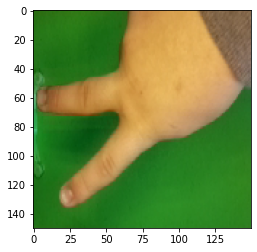

In [26]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')